任务 2.3 绘制促销商品和非促销商品销售金额的周环比增长率柱状图。

In [21]:
import pandas as pd
sale = pd.read_csv('/Users/dingjiadong/Desktop/uber/task1_1.csv')

In [22]:
wk_gwth = sale[['销售日期','销售金额','是否促销']]
wk_gwth['销售日期'] = pd.to_datetime(wk_gwth['销售日期'], format='%Y%m%d')
wk_gwth.set_index(wk_gwth['销售日期'],inplace=True)
wk_gwth

/var/folders/tv/qqztgq5x3mg6qcpqqfx53jp40000gn/T/ipykernel_82452/2577936767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk_gwth['销售日期'] = pd.to_datetime(wk_gwth['销售日期'], format='%Y%m%d')


,销售日期,销售金额,是否促销
销售日期,,,
2015-01-01,2015-01-01,3.00,否
2015-01-01,2015-01-01,2.40,否
2015-01-01,2015-01-01,6.50,是
2015-01-01,2015-01-01,11.90,否
2015-01-01,2015-01-01,8.90,否
...,...,...,...
2015-04-30,2015-04-30,7.80,否
2015-04-30,2015-04-30,2.84,是
2015-04-30,2015-04-30,2.20,否


In [23]:
disc = wk_gwth.loc[wk_gwth.是否促销=='是']
disc = disc.resample('W').sum()

In [24]:
disc.head()

,销售金额
销售日期,
2015-01-04,5281.99
2015-01-11,11949.74
2015-01-18,12225.74
2015-01-25,17072.59
2015-02-01,16129.18


In [25]:
ndisc = wk_gwth.loc[wk_gwth.是否促销=='否']
ndisc = ndisc.resample('W').sum()

In [26]:
ndisc.head()

,销售金额
销售日期,
2015-01-04,6302.94
2015-01-11,13624.40
2015-01-18,12401.14
2015-01-25,13190.02
2015-02-01,13157.34


In [27]:
ndisc_gwth = round(ndisc.pct_change(), 4)

In [28]:
ndisc_gwth

,销售金额
销售日期,
2015-01-04,NaN
2015-01-11,1.1616
2015-01-18,-0.0898
2015-01-25,0.0636
2015-02-01,-0.0025
2015-02-08,0.5747
2015-02-15,-0.2776
2015-02-22,0.4766
2015-03-01,-0.5376


In [29]:
disc_gwth = round(disc.pct_change(),4)
type(disc_gwth)

pandas.core.frame.DataFrame

In [30]:
gwth = pd.merge(disc_gwth,ndisc_gwth,left_index=True,right_index=True)

In [31]:
gwth

,销售金额_x,销售金额_y
销售日期,,
2015-01-04,NaN,NaN
2015-01-11,1.2624,1.1616
2015-01-18,0.0231,-0.0898
2015-01-25,0.3964,0.0636
2015-02-01,-0.0553,-0.0025
2015-02-08,-0.0878,0.5747
2015-02-15,0.6851,-0.2776
2015-02-22,-0.0173,0.4766
2015-03-01,-0.6679,-0.5376


In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


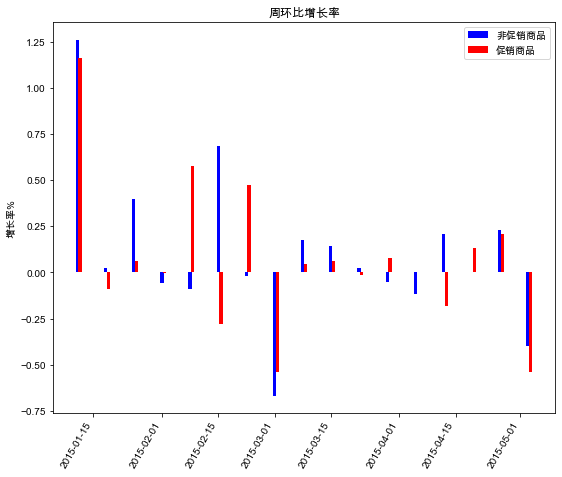

In [33]:
fig = plt.figure(figsize=(9,8))

bwidth = 0.8
plt.bar(gwth.index, gwth['销售金额_x'],bwidth, color = 'blue',label='非促销商品')


plt.bar(gwth.index+pd.offsets.Hour(16), gwth['销售金额_y'], bwidth, color = 'red', label='促销商品')

plt.title('周环比增长率')
plt.ylabel('增长率%')
plt.legend()

fig.autofmt_xdate(rotation = 60)

plt.show()
